# <신입세션 1주차 : 1번 과제>

- 관심있는 주제 : 2019~20년도 각 나라의 월별 한국 방문객의 수 차이 분석

- 관심있는 이유 : 현재 데이터 분석 수준이 높지 않아 쉽게 분석해볼 수 있는 데이터를 찾던 중, 한국 방문객 수에 관한 데이터를 수집했다. 이 데이터는 연령, 성, 목적별로 데이터가 나누어져 있다. 이 데이터를 활용하여 월별 각 나라의 한국 방문객 수를 시각화하고 나라마다 몇 월에 한국을 많이 방문하는지, 나라별로 한국 방문의 목적이 어떻게 다른지 등을 분석해보고자 이 주제에 관심을 가졌다. 각 상황에 맞게 데이터를 분석 및 시각화하고 추후 더 많은 연도의 데이터와 나라별 경제성장률 데이터를 활용하여 경제성장률이 성장하면 한국 방문객 수가 증가했는지 등의 상관관계 또한 분석해보고 싶다.

- 데이터 : 2019년 1월 ~ 2020년 4월까지의 나라별 한국 방문객 수 데이터(연령별, 성별, 목적별)
https://www.kaggle.com/datasets/bappekim/south-korea-visitors


## 데이터 훑어보기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
vis_a = pd.read_csv('../비어플/visitors/Enter_korea_by_age.csv')
vis_g = pd.read_csv('../비어플/visitors/Enter_korea_by_gender.csv')
vis_p = pd.read_csv('../비어플/visitors/Enter_korea_by_purpose.csv')

In [27]:
# 한국 방문객의 나이
print(vis_a)
print(vis_g)
print(vis_p)

       date           nation  visitor     growth      share  age0-20  \
0    2019-1            China   392814  28.737870  35.555117    36520   
1    2019-1            Japan   206526  23.606830  18.693468    18015   
2    2019-1           Taiwan    87954  16.003693   7.961057    18888   
3    2019-1        Hong Kong    35896   3.533212   3.249086     3890   
4    2019-1            Macao     2570 -12.376406   0.232621      223   
..      ...              ...      ...        ...        ...      ...   
955  2020-4   Oceania others       13 -97.239915   0.044195        0   
956  2020-4     South Africa       22 -98.101812   0.074792        0   
957  2020-4    Africa others      177 -95.412131   0.601734        3   
958  2020-4        Stateless        3 -95.312500   0.010199        0   
959  2020-4  Overseas Korean      698 -96.540101   2.372939       13   

     age21-30  age31-40  age41-50  age51-60  age61  
0      108591    103657     48574     40893  40998  
1       57921     34165     3

In [28]:
vis_a.groupby('nation').date.count()

nation
*GCC               16
Africa others      16
America others     16
Asia others        16
Austrailia         16
Austria            16
Bangladesh         16
Belgium            16
Brazil             16
Bulgaria           16
Cambodia           16
Canada             16
China              16
Croatia            16
Denmark            16
Europe others      16
Finland            16
France             16
Germany            16
Greece             16
Hong Kong          16
India              16
Indonesia          16
Iran               16
Ireland            16
Israel             16
Italy              16
Japan              16
Kazakhstan         16
Macao              16
Malaysia           16
Mexico             16
Mongolia           16
Myanmar            16
Netherland         16
New Zealand        16
Norway             16
Oceania others     16
Overseas Korean    16
Pakistan           16
Phillipines        16
Poland             16
Portugal           16
Romania            16
Russia             16
Sin

# <신입세션 1주차 : 2번 과제>

## 1. 가설 세우기

 - 온도가 높고 습도가 높아짐에 따라 따릉이 이용률이 줄어들 것이다.
 - 여름, 겨울보다 봄, 가을의 따릉이 이용률이 더 높을 것이다.

## 2. 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. 따릉이 데이터 불러오기
### bike 데이터 소개
 - Date : 날짜
 - Rented Bike Count : 대여 자전거 수
 - Hour : 대여 시간
 - Temperature(°C) : 온도
 - Humidity(%) : 습도
 - Wind speed (m/s) : 풍속
 - Visibility (10m) : 가시성
 - Dew point temperature(°C) : 이슬점
 - Solar Radiation (MJ/m2) : 일사량
 - Rainfall(mm) : 강수량
 - Snowfall (cm) : 적설량
 - Seasons : 계절
 - Holiday : 공휴일
 - Functioning Day : 이용 가능일

In [2]:
bike = pd.read_csv('../비어플/train.csv', encoding='cp949')

## 4. EDA

### 4-1. 데이터 살펴보기

In [3]:
# 데이터 확인
bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes


In [4]:
# 결측치, 변수 타입, 데이터 차원 확인
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7008 non-null   object 
 1   Rented Bike Count          7008 non-null   int64  
 2   Hour                       7008 non-null   int64  
 3   Temperature(°C)            6306 non-null   float64
 4   Humidity(%)                7008 non-null   int64  
 5   Wind speed (m/s)           6303 non-null   float64
 6   Visibility (10m)           7008 non-null   int64  
 7   Dew point temperature(°C)  7008 non-null   float64
 8   Solar Radiation (MJ/m2)    7008 non-null   float64
 9   Rainfall(mm)               7008 non-null   float64
 10  Snowfall (cm)              7008 non-null   float64
 11  Seasons                    6309 non-null   object 
 12  Holiday                    7008 non-null   object 
 13  Functioning Day            7008 non-null   objec

In [5]:
# 열마다 값의 건수 찾기
features = bike.keys().tolist()

for key in features:
    print(bike[key].value_counts(dropna=False))
    print('----------------------------------------')

Date
14/02/2018    24
01/12/2017    23
16/04/2018    23
30/10/2018    23
03/07/2018    23
              ..
05/01/2018    15
19/05/2018    14
13/01/2018    14
11/03/2018    13
04/05/2018    12
Name: count, Length: 365, dtype: int64
----------------------------------------
Rented Bike Count
0       236
103      17
122      16
178      16
165      15
       ... 
2377      1
1424      1
2194      1
3146      1
2234      1
Name: count, Length: 2038, dtype: int64
----------------------------------------
Hour
14    310
23    307
16    298
11    297
8     297
19    296
1     296
4     295
13    293
5     293
12    293
22    292
18    292
21    291
10    291
17    288
20    288
15    287
0     286
2     286
6     286
9     284
3     283
7     279
Name: count, dtype: int64
----------------------------------------
Temperature(°C)
 NaN     702
 20.5     30
 23.4     29
 22.6     29
 7.6      28
        ... 
 37.3      1
 36.0      1
-16.5      1
-13.6      1
 36.5      1
Name: count, Length: 541, 

In [6]:
# 기술 통계량 확인
bike.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,7008.000000,7008.000000,6306.000000,7008.000000,6303.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,708.597603,11.559646,13.030082,58.141981,1.732937,1440.761558,4.042066,0.574576,0.150271,0.075300
std,647.980391,6.923619,11.986773,20.423404,1.030763,607.545441,13.121249,0.874529,1.134598,0.440936
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,6.000000,3.600000,42.000000,1.000000,946.000000,-4.800000,0.000000,0.000000,0.000000
50%,505.500000,12.000000,14.000000,57.000000,1.500000,1703.000000,5.100000,0.010000,0.000000,0.000000
75%,1071.000000,18.000000,22.675000,74.000000,2.350000,2000.000000,14.900000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### 4-2. 결측치 및 중복 데이터 확인

In [7]:
# 결측치를 갖고 있는 변수 및 개수 확인
bike.isna().sum(axis=0).sort_values()

Date                           0
Rented Bike Count              0
Hour                           0
Humidity(%)                    0
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Holiday                        0
Functioning Day                0
Seasons                      699
Temperature(°C)              702
Wind speed (m/s)             705
dtype: int64

In [8]:
bike[bike['Seasons'].isna()] # 계절이 결측치인 데이터 찾기

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
22,31/08/2018,987,14,29.3,41,1.9,1928,14.6,3.00,0.0,0.0,NaN,No Holiday,Yes
30,09/11/2018,0,23,10.9,76,1.2,456,6.8,0.00,0.0,0.0,NaN,No Holiday,No
47,15/09/2018,1566,18,NaN,76,1.2,2000,19.6,0.12,0.0,0.0,NaN,No Holiday,Yes
55,24/01/2018,121,22,-15.2,45,4.0,2000,-24.4,0.00,0.0,0.7,NaN,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6926,15/03/2018,567,21,10.4,96,2.7,499,9.7,0.00,0.0,0.0,NaN,No Holiday,Yes
6968,22/07/2018,772,1,NaN,60,0.8,2000,18.8,0.00,0.0,0.0,NaN,No Holiday,Yes
6983,28/11/2018,1540,8,NaN,29,1.1,1337,-14.1,0.02,0.0,0.0,NaN,No Holiday,Yes
6988,13/06/2018,2088,14,26.6,50,2.4,1119,15.3,2.95,0.0,0.0,NaN,No Holiday,Yes


In [9]:
bike[bike['Temperature(°C)'].isna()] # 온도가 결측치인 데이터 찾기

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
6,04/07/2018,941,11,NaN,60,2.3,1861,21.3,2.61,0.0,0.0,Summer,No Holiday,Yes
11,24/05/2018,1390,7,NaN,61,1.3,1818,5.1,0.42,0.0,0.0,Spring,No Holiday,Yes
18,10/04/2018,133,21,NaN,70,7.3,1634,11.9,0.00,0.5,0.0,Spring,No Holiday,Yes
19,10/11/2018,754,0,NaN,77,0.9,433,7.4,0.00,0.0,0.0,Autumn,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6978,27/02/2018,72,5,NaN,50,0.1,1026,-8.6,0.00,0.0,0.0,Winter,No Holiday,Yes
6979,23/02/2018,42,0,NaN,86,2.7,54,-0.3,0.00,0.4,0.4,Winter,No Holiday,Yes
6983,28/11/2018,1540,8,NaN,29,1.1,1337,-14.1,0.02,0.0,0.0,NaN,No Holiday,Yes
6999,15/11/2018,1416,17,NaN,38,1.4,884,-0.3,0.29,0.0,0.0,Autumn,No Holiday,Yes


In [10]:
bike[bike['Wind speed (m/s)'].isna()] # 풍속이 결측치인 데이터 찾기

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
10,21/03/2018,374,10,3.6,37,NaN,2000,-9.7,0.83,0.0,0.0,Spring,No Holiday,Yes
23,14/03/2018,309,1,13.7,73,NaN,1182,8.9,0.00,0.0,0.0,Spring,No Holiday,Yes
33,26/06/2018,26,14,21.0,97,NaN,381,20.4,0.26,2.5,0.0,Summer,No Holiday,Yes
51,09/01/2018,320,9,-6.0,61,NaN,1547,-12.3,0.13,0.0,0.6,Winter,No Holiday,Yes
52,16/07/2018,688,11,31.5,51,NaN,1498,20.1,2.83,0.0,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6948,11/10/2018,1398,21,NaN,52,NaN,2000,0.0,0.00,0.0,0.0,Autumn,No Holiday,Yes
6953,08/03/2018,17,5,3.1,90,NaN,974,1.6,0.00,0.0,0.0,Spring,No Holiday,Yes
6975,22/09/2018,1062,11,22.7,55,NaN,1297,13.1,1.86,0.0,0.0,Autumn,No Holiday,Yes
6993,06/05/2018,211,13,16.4,94,NaN,1947,15.4,0.78,0.0,0.0,Spring,No Holiday,Yes


In [11]:
# 앞에서 확인했던 대로 이 3가지 데이터에 결측치가 존재한다.
bike[['Seasons','Temperature(°C)','Wind speed (m/s)']].isna().sum(axis=0).sort_values()

Seasons             699
Temperature(°C)     702
Wind speed (m/s)    705
dtype: int64

In [15]:
bike['datetime'] = pd.to_datetime(bike['Date'])
bike['datetime'] = bike['datetime'].dt.month
month_rent = bike.groupby('datetime')['Rented Bike Count'].sum().reset_index()

C:\Users\swc08\AppData\Local\Temp\ipykernel_23348\3956988607.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  bike['datetime'] = pd.to_datetime(bike['Date'])


In [16]:
# 먼저 'Seasons' 데이터의 결측치를 날짜(월)에 따라 적용한다.
# 월별 NaN을 확인한다.
bike.groupby('datetime')['Seasons'].value_counts(dropna=False)

datetime  Seasons
1         Winter     543
          NaN         73
2         Winter     496
          NaN         44
3         Spring     523
          NaN         47
4         Spring     507
          NaN         63
5         Spring     524
          NaN         63
6         Summer     522
          NaN         62
7         Summer     553
          NaN         55
8         Summer     523
          NaN         56
9         Autumn     520
          NaN         59
10        Autumn     540
          NaN         59
11        Autumn     527
          NaN         55
12        Winter     531
          NaN         63
Name: count, dtype: int64

12월, 1월, 2월 = 겨울 \
3월, 4월, 5월 = 봄\
6월, 7월, 8월 = 여름\
9월, 10월, 11월 = 가을\
이라는 것을 알 수 있다.

In [17]:
# 'Seasons' 열의 결측치를 각 월에 해당하는 계절로 대체하는 함수
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    elif month in [12, 1, 2]:
        return 'Winter'

# 'Seasons' 열의 결측치를 월별로 채우기
bike['Seasons'] = bike['Seasons'].fillna(bike['datetime'].apply(get_season))

In [18]:
# 월별 온도의 결측치 개수 확인
bike.groupby('datetime')['Temperature(°C)'].value_counts(dropna=False)

datetime  Temperature(°C)
1          NaN               71
           1.1                8
           3.9                8
          -5.1                7
           0.8                7
                             ..
12         6.8                1
           7.0                1
           7.3                1
           8.0                1
           8.2                1
Name: count, Length: 2110, dtype: int64

In [19]:
# 월별 온도를 해당 월의 평균 온도로 대체한다.
month_mean_temp = bike.groupby('datetime')['Temperature(°C)'].mean()
# 'Temperature(°C)' 열의 결측치를 월별 평균 온도로 대체하는 함수
def na_temp(row):
    if pd.isnull(row['Temperature(°C)']):
        return month_mean_temp[row['datetime']]
    else:
        return row['Temperature(°C)']

# 결측치 대체
bike['Temperature(°C)'] = bike.apply(na_temp, axis=1)
print(bike[['datetime', 'Temperature(°C)']].head())

   datetime  Temperature(°C)
0        10        13.071053
1         5        23.000000
2        11         6.200000
3         8        23.200000
4         6        23.700000


In [20]:
month_mean_wind = bike.groupby('datetime')['Wind speed (m/s)'].mean()
# 'Wind speed (m/s)' 열의 결측치를 월별 평균 온도로 대체하는 함수
def na_wind(row):
    if pd.isnull(row['Wind speed (m/s)']):
        return month_mean_wind[row['datetime']]
    else:
        return row['Wind speed (m/s)']

# 결측치 대체
bike['Wind speed (m/s)'] = bike.apply(na_wind, axis=1)
print(bike[['datetime', 'Wind speed (m/s)']].head())

   datetime  Wind speed (m/s)
0        10               1.3
1         5               2.8
2        11               0.6
3         8               1.6
4         6               0.9


In [21]:
# 결측치가 없는지 확인
bike.isna().sum(axis=0).sort_values()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
datetime                     0
dtype: int64

In [22]:
bike[bike.duplicated()] # 중복행 없음.

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,datetime


Text(0.5, 1.0, 'correlation heatmap')

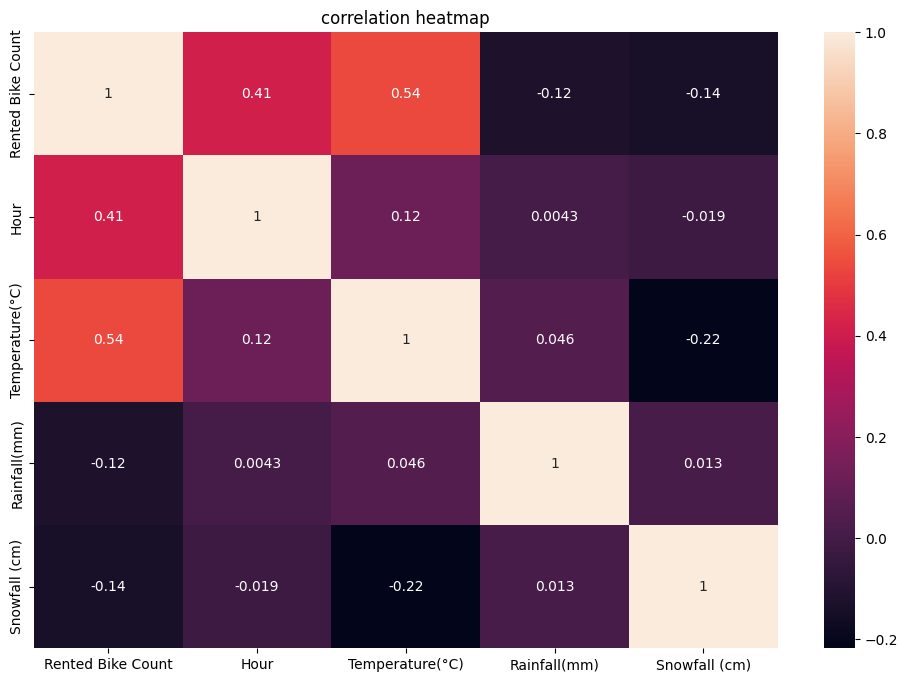

In [23]:
plt.figure(figsize=(12,8))  #사이즈 조정
sns.heatmap(bike[['Rented Bike Count','Hour','Temperature(°C)','Rainfall(mm)','Snowfall (cm)']].corr(),annot=True) #annot는 값  표기
plt.title('correlation heatmap') #상관계수 행렬 히트맵

In [24]:
bike[['Rented Bike Count','Hour','Temperature(°C)','Rainfall(mm)','Snowfall (cm)']]

,Rented Bike Count,Hour,Temperature(°C),Rainfall(mm),Snowfall (cm)
0,1492,16,13.071053,0.0,0.0
1,1536,14,23.000000,0.0,0.0
2,327,2,6.200000,0.0,0.0
3,170,4,23.200000,0.0,0.0
4,45,5,23.700000,0.1,0.0
...,...,...,...,...,...
7003,255,7,-9.600000,0.0,0.0
7004,104,4,10.600000,0.0,0.0
7005,569,0,14.700000,0.0,0.0
7006,2234,8,20.500000,0.0,0.0


In [25]:
bike[['Rented Bike Count','Hour','Temperature(°C)','Rainfall(mm)','Snowfall (cm)']].corr()

,Rented Bike Count,Hour,Temperature(°C),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.412000,0.535644,-0.124764,-0.140378
Hour,0.412000,1.000000,0.116745,0.004299,-0.019116
Temperature(°C),0.535644,0.116745,1.000000,0.045631,-0.217607
Rainfall(mm),-0.124764,0.004299,0.045631,1.000000,0.013482
Snowfall (cm),-0.140378,-0.019116,-0.217607,0.013482,1.000000


### 4-3 종속변수 Rented Bike Count 확인

- 해당 일의 따릉이 대여 건수 데이터
- 계절에 따른 렌트 횟수를 분석
- 온도와 습도에 따른 렌트 횟수 분석

In [26]:
bike['Rented Bike Count'].value_counts()

Rented Bike Count
0       236
103      17
122      16
178      16
165      15
       ... 
2377      1
1424      1
2194      1
3146      1
2234      1
Name: count, Length: 2038, dtype: int64

In [27]:
bike['Rented Bike Count'].value_counts().values

array([236,  17,  16, ...,   1,   1,   1], dtype=int64)

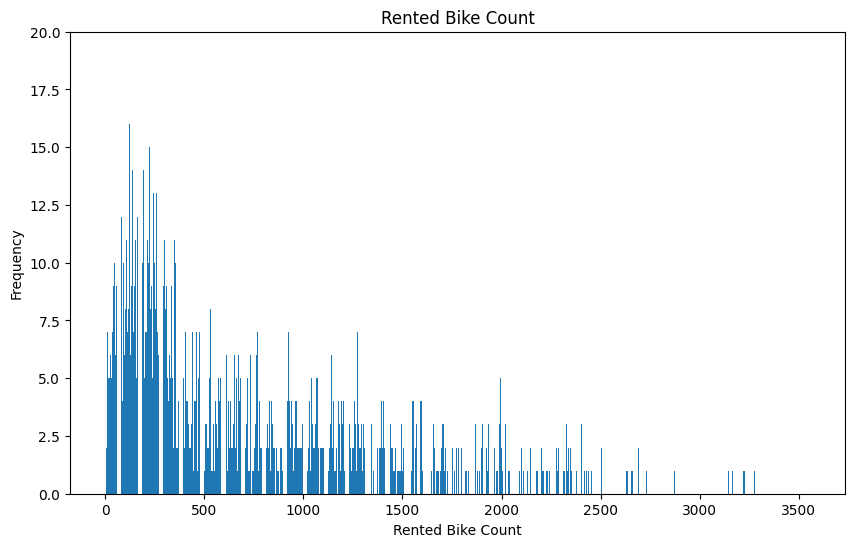

In [28]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(bike['Rented Bike Count'].value_counts().index, bike['Rented Bike Count'].value_counts().values)
plt.xlabel('Rented Bike Count')  # X축 레이블
plt.ylabel('Frequency')  # Y축 레이블
plt.title('Rented Bike Count')  # 그래프 제목
plt.ylim(0, 20)
plt.show()

### 4-4 Season 

- 4계절이므로 데이터가 4개로 나누어짐.
- 데이터 중 결측치가 존재하지만 다른 데이터를 보면 해당 월의 계절을 알 수 있는 데이터가 존재하므로 날짜 데이터를 참고하여 결측치를 대체해야 함.

In [29]:
bike['Seasons'].value_counts()

Seasons
Summer    1771
Autumn    1760
Winter    1750
Spring    1727
Name: count, dtype: int64

In [30]:
bike['Seasons'].value_counts().values

array([1771, 1760, 1750, 1727], dtype=int64)

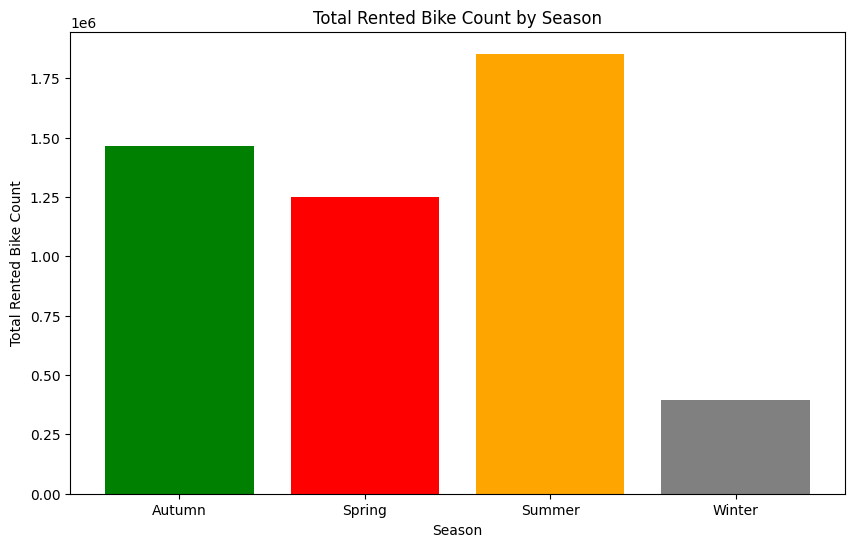

In [31]:
season_rent = bike.groupby('Seasons')['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(season_rent['Seasons'], season_rent['Rented Bike Count'], color=['green', 'red', 'orange', 'grey'])
plt.xlabel('Season')
plt.ylabel('Total Rented Bike Count')
plt.title('Total Rented Bike Count by Season')
plt.show()

겨울 < 봄 < 가을 < 여름 순으로 이용률이 많다. \
이 그래프에는 계절 데이터의 결측치가 존재하기 때문에 정확한 데이터 분석으로 볼 수 없다.\
이에 월별로 렌트 수가 어떻게 되는지 살펴본다.

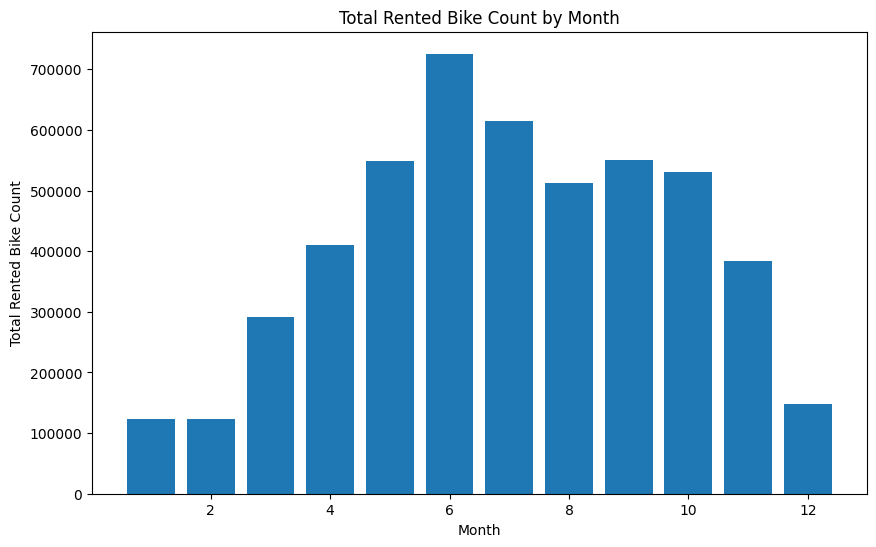

In [119]:
plt.figure(figsize=(10, 6))
plt.bar(month_rent['datetime'], month_rent['Rented Bike Count'])
plt.xlabel('Month')
plt.ylabel('Total Rented Bike Count')
plt.title('Total Rented Bike Count by Month')
plt.show()

겨울인 12월, 1월, 2월은 상대적으로 렌트 수가 적다.\
날씨가 따뜻해지는 3월부터 렌트 수가 증가하고 한여름에 잠깐 줄어들다가 가을에 다시 미약적으로 증가하는 것이 보인다. \
가설2인 '여름, 겨울보다 봄, 가을의 따릉이 이용률이 더 높을 것이다'라는 가설에는 오류가 있었음이 발견되었다. \
추운 겨울에는 따릉이 이용률이 매우 낮았지만, 더운 여름의 따릉이 이용률이 제일 높았던 것을 볼 수 있다.\
이제 각 계절의 환경 조건에 따른 이용률 차이를 분석하고자 한다.

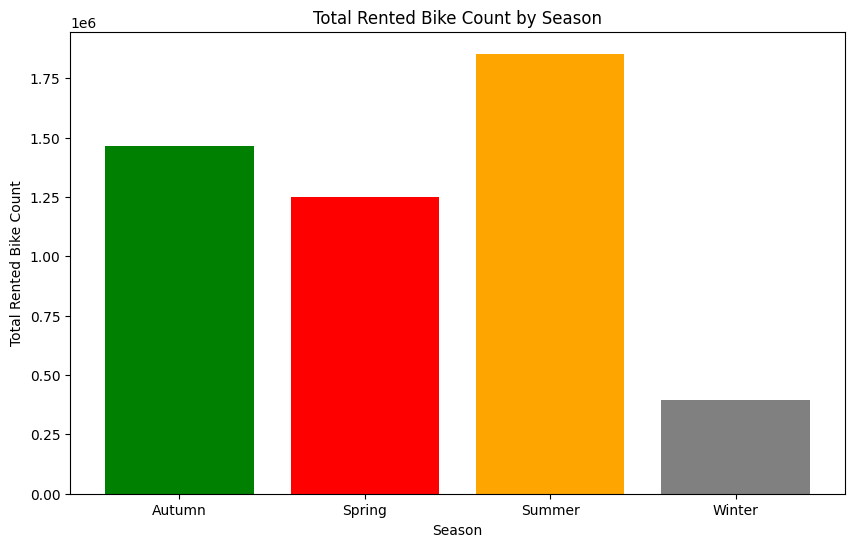

In [121]:
# 수정된 데이터로 그래프를 그려본다.
plt.figure(figsize=(10, 6))
plt.bar(season_rent['Seasons'], season_rent['Rented Bike Count'], color=['green', 'red', 'orange', 'grey'])
plt.xlabel('Season')
plt.ylabel('Total Rented Bike Count')
plt.title('Total Rented Bike Count by Season')
plt.show()

### 계절별 온도의 변화에 따른 이용률 확인하기

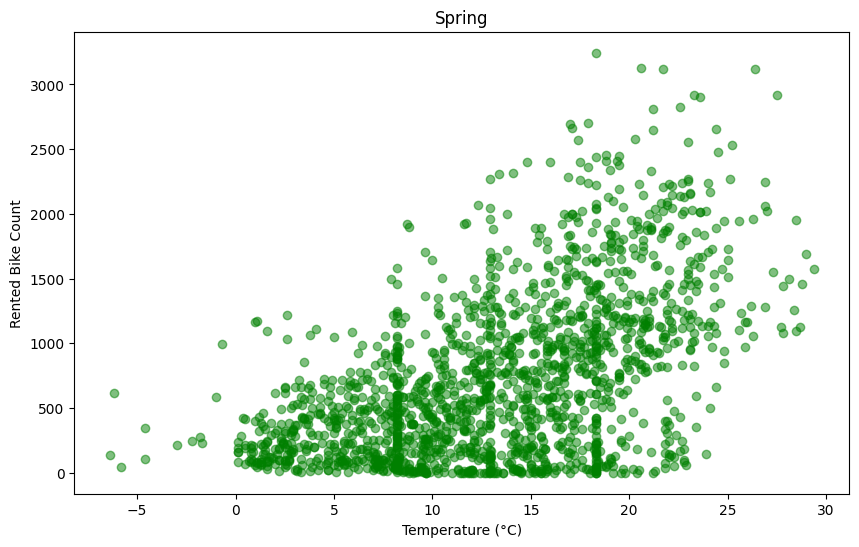

In [48]:
# 봄
bike_spring = bike[bike['Seasons']=='Spring']

plt.figure(figsize=(10, 6))
plt.scatter(bike_spring['Temperature(°C)'], bike_spring['Rented Bike Count'], alpha=0.5, color='green')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.title('Spring')
plt.show()

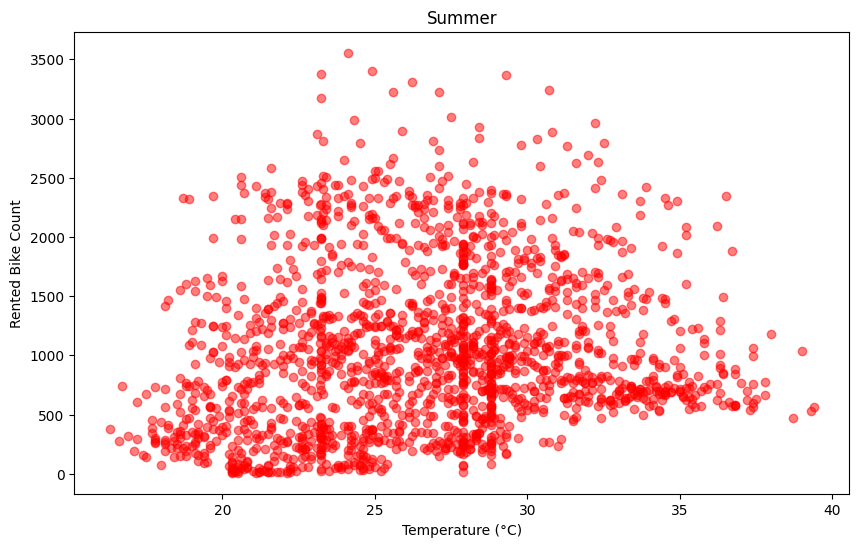

In [49]:
# 여름
bike_summer = bike[bike['Seasons']=='Summer']

plt.figure(figsize=(10, 6))
plt.scatter(bike_summer['Temperature(°C)'], bike_summer['Rented Bike Count'], alpha=0.5, color='red')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.title('Summer')
plt.show()

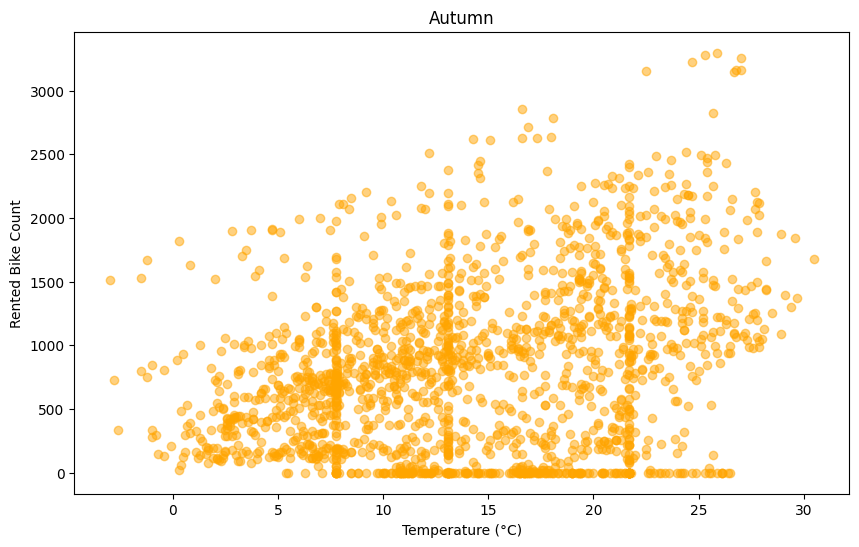

In [51]:
# 가을
bike_Autumn = bike[bike['Seasons']=='Autumn']

plt.figure(figsize=(10, 6))
plt.scatter(bike_Autumn['Temperature(°C)'], bike_Autumn['Rented Bike Count'], alpha=0.5, color='orange')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.title('Autumn')
plt.show()

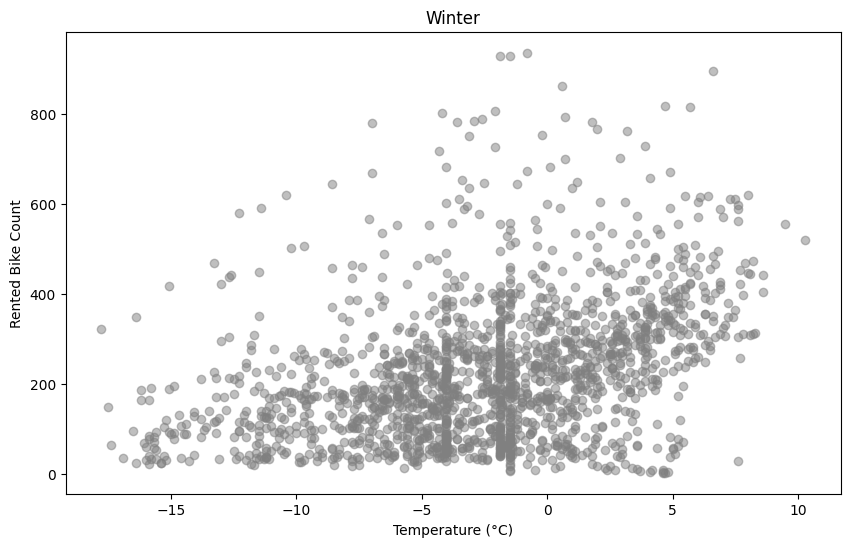

In [52]:
# 겨울
bike_Winter = bike[bike['Seasons']=='Winter']

plt.figure(figsize=(10, 6))
plt.scatter(bike_Winter['Temperature(°C)'], bike_Winter['Rented Bike Count'], alpha=0.5,color='grey')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.title('Winter')
plt.show()

그래프를 보면 여름을 제외한 봄, 가을, 겨울은 온도가 올라갈 수록 이용률이 증가한 것을 알 수 있다.\
여름에는 온도가 평균치에 있을 때 이용률이 많은 것을 알 수 있다.\
가설1을 확인하기 위해 온도와 습도 간의 관계를 살펴보고자 한다.

In [38]:
bike[['Temperature(°C)','Humidity(%)']].corr()

,Temperature(°C),Humidity(%)
Temperature(°C),1.000000,0.167163
Humidity(%),0.167163,1.000000


두 변수 간의 상관관계는 매우 적은 것으로 확인된다. 따라서, 가설이 맞지 않다고 볼 수 있다.\
가설에 대한 검증은 마무리하고 변수를 시각화해보는 작업을 하고자 한다.

### 4-5 Holiday

공휴일의 대여 건수 및 이용 시간이 공휴일이 아닌 날보다 많은 지 확인하고자 한다.

C:\Users\swc08\AppData\Local\Temp\ipykernel_23348\2175458874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Holiday', y='Rented Bike Count', data=bike, palette=['blue','red'])


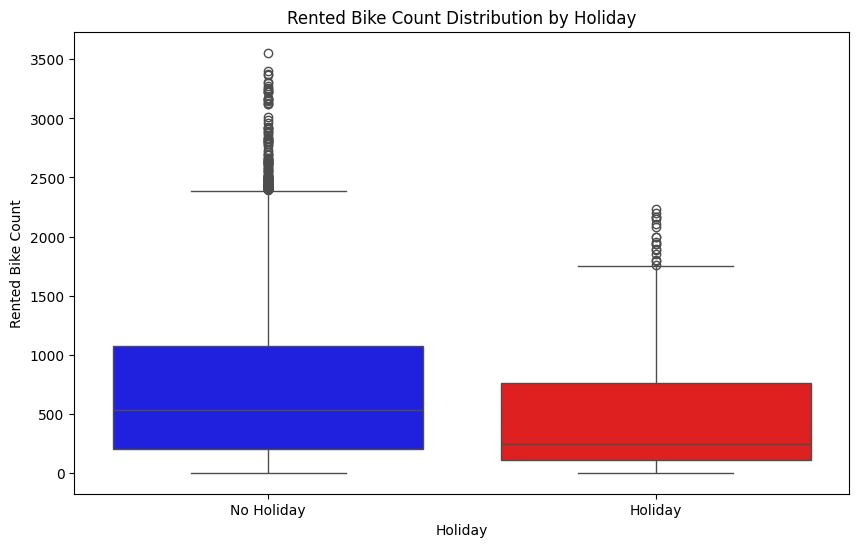

C:\Users\swc08\AppData\Local\Temp\ipykernel_23348\2175458874.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Holiday', y='Rented Bike Count', data=holiday_rent_mean, palette=['blue','red'], order=['No Holiday','Holiday'])


<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

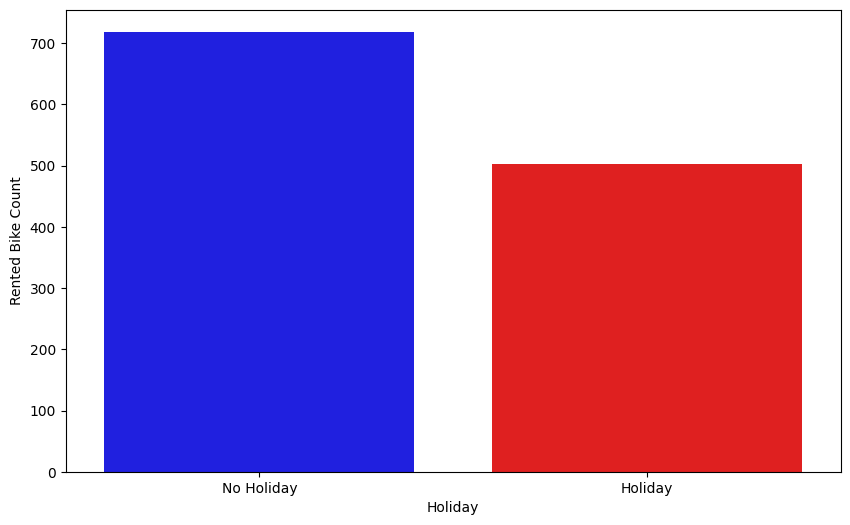

In [192]:
# 공휴일에 따른 대여 건수
plt.figure(figsize=(10,6))
sns.boxplot(x='Holiday', y='Rented Bike Count', data=bike, palette=['blue','red'])
plt.title('Rented Bike Count Distribution by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.show()

holiday_rent_mean = bike.groupby('Holiday')['Rented Bike Count'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Holiday', y='Rented Bike Count', data=holiday_rent_mean, palette=['blue','red'], order=['No Holiday','Holiday'])

공휴일에 따라 대여 건수에는 차이가 있음이 보인다.\
공휴일이 아닌 날의 대여 건수가 확연하게 많은 것으로 보인다. 출퇴근에 이용하는 사람이 많아서 그럴 수 있다고 보인다.\

### 4-6 Functioning Day

- 'Yes', 'No'로 데이터가 나누어짐.
- 어떤 것을 의미하는 변수인지 확인해볼 필요가 있음.

In [110]:
fd_spring = pd.DataFrame(bike[bike['Seasons']=='Spring'].groupby('Functioning Day')[['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)',
                                                                                     'Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)',
                                                                                     'Snowfall (cm)']].mean())
fd_summer = pd.DataFrame(bike[bike['Seasons']=='Summer'].groupby('Functioning Day')[['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)',
                                                                                     'Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)',
                                                                                     'Snowfall (cm)']].mean())
fd_autumn = pd.DataFrame(bike[bike['Seasons']=='Autumn'].groupby('Functioning Day')[['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)',
                                                                                     'Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)',
                                                                                     'Snowfall (cm)']].mean())
fd_winter = pd.DataFrame(bike[bike['Seasons']=='Winter'].groupby('Functioning Day')[['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)',
                                                                                     'Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)',
                                                                                     'Snowfall (cm)']].mean())

In [112]:
fd_spring

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Functioning Day,,,,,,,,
No,14.109318,61.585366,2.468644,1176.317073,5.707317,0.899512,0.000000,0.0
Yes,13.192626,59.087189,1.855745,1238.977461,4.229122,0.683974,0.212159,0.0


In [113]:
fd_summer

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Functioning Day,,,,,,,,
Yes,26.656198,64.746471,1.607946,1506.411067,18.73563,0.779633,0.230604,0.0


In [114]:
fd_autumn

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Functioning Day,,,,,,,,
No,16.170432,60.466667,1.549685,1585.343590,8.164103,0.509692,0.180513,0.000000
Yes,13.912939,58.851757,1.513378,1558.656869,5.139553,0.534716,0.119425,0.064217


In [115]:
fd_winter

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Functioning Day,,,,,,,,
Yes,-2.513845,49.573143,1.941941,1453.381714,-12.487829,0.296926,0.037086,0.244114


In [118]:
bike[bike['Functioning Day']=='No']['Holiday'].value_counts()

Holiday
No Holiday    217
Holiday        19
Name: count, dtype: int64

위 결과를 통해 'Functioning Day'가 기상 상황에 영향을 미치는지 확인해봤지만, 충분한 근거를 찾을 수 없었으며\
공휴일인 날따라 달라지지 않는 다는 것도 확인 되었다.

### 4-7 Solar Radiation (MJ/m2)

- 일사량이 측정되지 않은 즉 0.0인 행이 많음.
- 일사량과 온도와의 상관관계가 있을 것이라고 추정.
- 0.0인 행을 제거하고 일사량과 온도의 관계 파악.

0.574576198630137


<Axes: xlabel='Solar Radiation (MJ/m2)', ylabel='Temperature(°C)'>

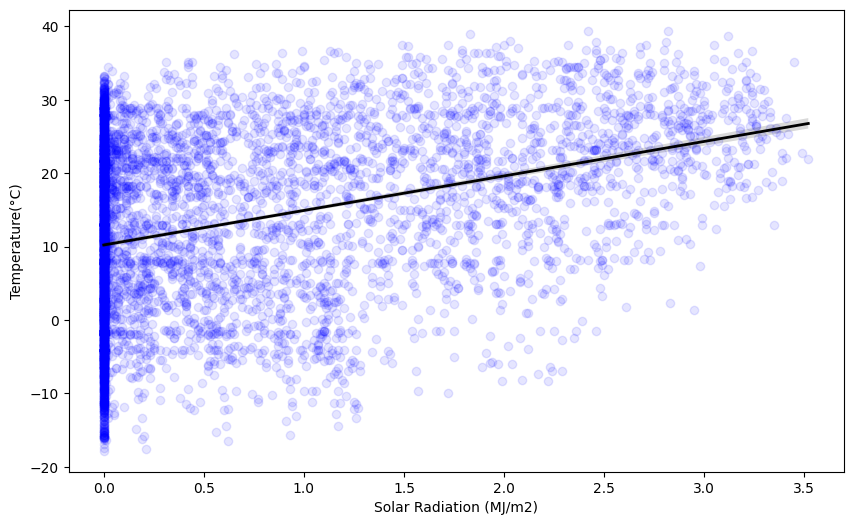

In [191]:
# 원본 데이터일 경우
plt.figure(figsize=(10,6))
print(bike['Solar Radiation (MJ/m2)'].mean())
sns.regplot(x='Solar Radiation (MJ/m2)', y='Temperature(°C)', data=bike, scatter_kws={'alpha':0.1}, color='blue',line_kws={'color': 'black', 'linewidth': 2})

일사량이 커질수록 온도도 증가하는 것으로 볼 수 있음. (원본 데이터로 보더라도 어느 정도 관계를 파악할 수 있음.)\
하지만, 0.0인 데이터가 많아 두 데이터 간의 평균 차이가 매우 큰 것을 알 수 있음.

In [140]:
cond = bike['Solar Radiation (MJ/m2)']==0.0
bike_sr0 = bike[~cond]

1.1253856903297932


<Axes: xlabel='Solar Radiation (MJ/m2)', ylabel='Temperature(°C)'>

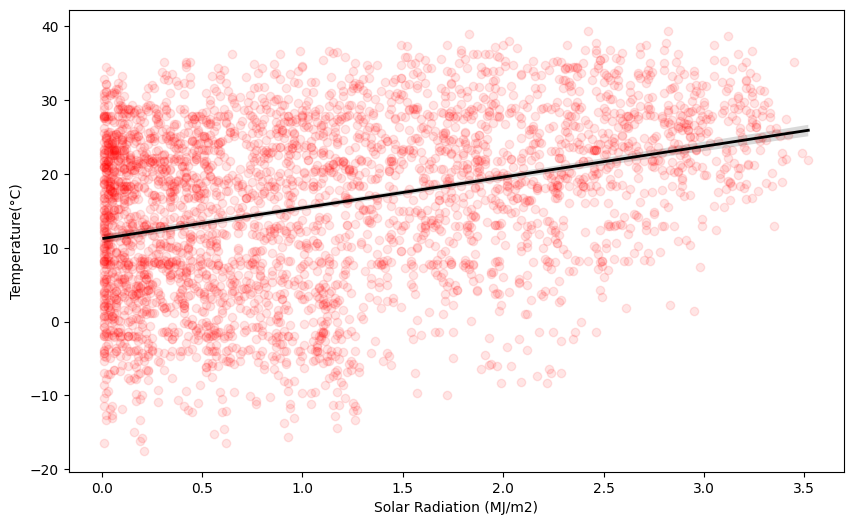

In [190]:
# 0.0인 행을 지웠을 경우
plt.figure(figsize=(10,6))
print(bike_sr0['Solar Radiation (MJ/m2)'].mean())
sns.regplot(x='Solar Radiation (MJ/m2)', y='Temperature(°C)', data=bike_sr0,
            scatter_kws={'alpha':0.1}, color='red', line_kws={'color': 'black', 'linewidth': 2})

### 4-8 Visibility (10m)

- 가시성을 의미하는 변수
- 가시성의 변함에 따라 각 변수는 어떻게 달라지는지 확인

In [185]:
print(bike['Visibility (10m)'].value_counts())
print('max :', bike['Visibility (10m)'].max())
print('min :', bike['Visibility (10m)'].min())

Visibility (10m)
2000    1831
1995      26
1999      24
1985      22
1996      21
        ... 
627        1
1248       1
1612       1
434        1
188        1
Name: count, Length: 1701, dtype: int64
max : 2000
min : 27


<function matplotlib.pyplot.show(close=None, block=None)>

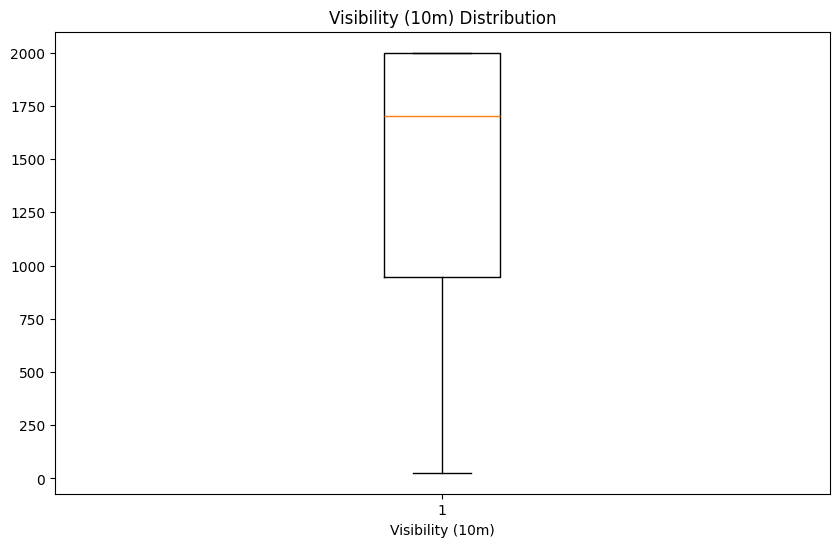

In [194]:
plt.figure(figsize=(10,6))
plt.boxplot(x='Visibility (10m)', data=bike)
plt.xlabel('Visibility (10m)')
plt.title('Visibility (10m) Distribution')
plt.show

가시성은 270m ~ 20km 까지 데이터 존재

In [210]:
a = ['Temperature(°C)','Humidity(%)','Rainfall(mm)','Snowfall (cm)']
for i in a:
    print('Visibility (10m) ~',i,':',round(bike[['Visibility (10m)',i]].corr().values[1,0],2))

Visibility (10m) ~ Temperature(°C) : 0.04
Visibility (10m) ~ Humidity(%) : -0.54
Visibility (10m) ~ Rainfall(mm) : -0.17
Visibility (10m) ~ Snowfall (cm) : -0.12


위 상관계수를 통해 습도가 낮을 수록 가시성이 증가한다는 것을 어느정도 알 수 있다.

### 4-9 Hour

- 사용했던 시각을 알려주는 자료로 00시부터 23시까지 존재

In [228]:
bike_hour = bike['Hour'].value_counts()
bike_hour = bike_hour.sort_index()
bike_hour

Hour
0     286
1     296
2     286
3     283
4     295
5     293
6     286
7     279
8     297
9     284
10    291
11    297
12    293
13    293
14    310
15    287
16    298
17    288
18    292
19    296
20    288
21    291
22    292
23    307
Name: count, dtype: int64

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

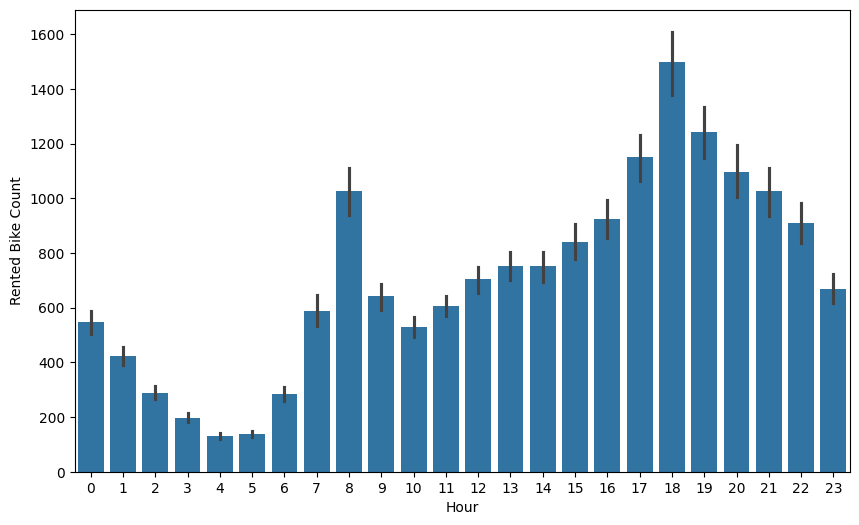

In [230]:
plt.figure(figsize=(10,6))
sns.barplot(x='Hour', y='Rented Bike Count', data=bike)

시간대별 대여 건수를 확인해보자.
- 새벽 시간대는 5시 정도까지 대여 건수가 줄어든 것을 알 수 있다.
- 출근 시간에 가까워질수록 대여 건수가 증가하고 8시에 많은 것을 알 수 있다.
- 낮에는 점차 대여 건수가 증가하다가 퇴근 시간대인 18시에 가장 많은 것을 볼 수 있다.

### 4-10 Rainfall(mm)과 Snowfall (cm)

- 강수량과 적셜량
- 습도에 영향을 끼칠 수 있는 데이터
- 맑은 날과 비교했을 때 대여 건수가 차이날 수 있음

In [233]:
bike[['Rainfall(mm)','Snowfall (cm)','Humidity(%)']].corr()

,Rainfall(mm),Snowfall (cm),Humidity(%)
Rainfall(mm),1.000000,0.013482,0.237836
Snowfall (cm),0.013482,1.000000,0.103439
Humidity(%),0.237836,0.103439,1.000000


<Axes: xlabel='Rainfall(mm)', ylabel='Humidity(%)'>

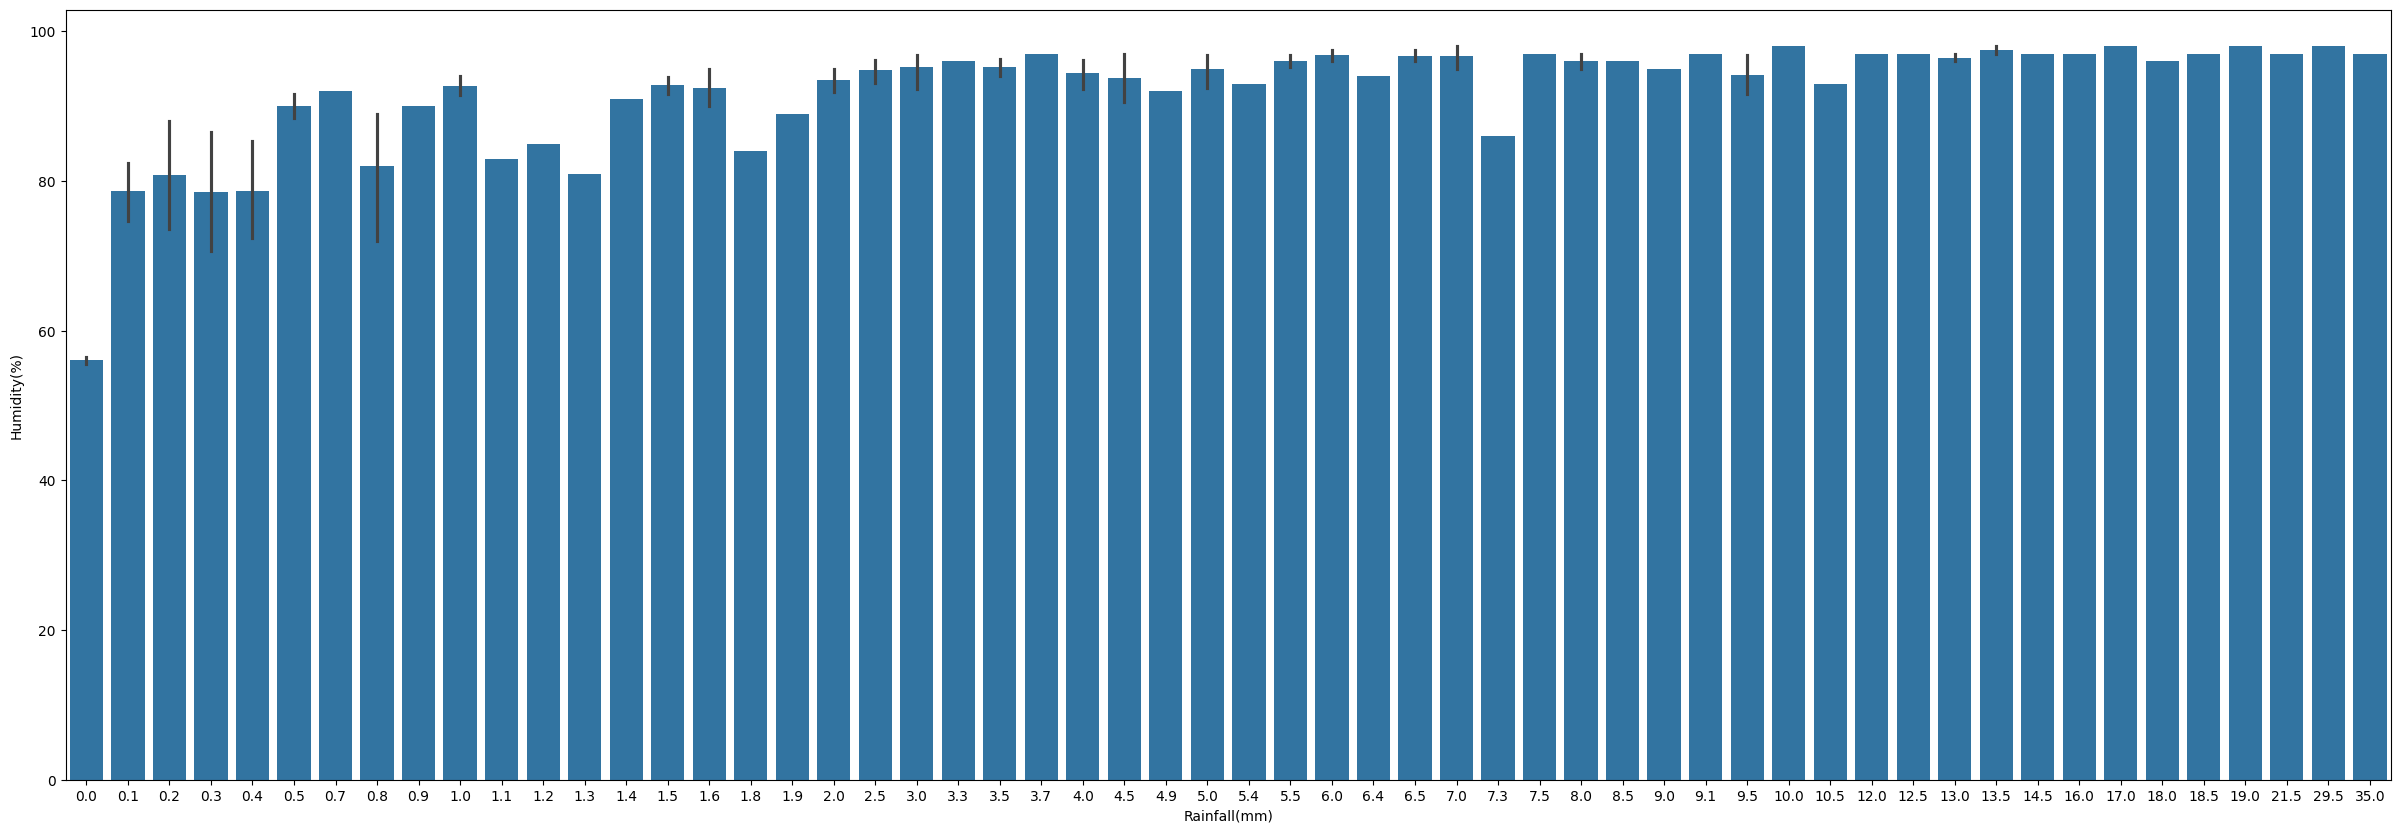

In [263]:
plt.figure(figsize=(30,10))
sns.barplot(x='Rainfall(mm)',y='Humidity(%)', data=bike)

맑은 날에는 강수량이 0일 것이다. 그러므로 0일 때와 0.1 이상일 때의 평균을 비교해보자.

In [260]:
rain_0 = bike[bike['Rainfall(mm)']==0.0]
rain = bike[bike['Rainfall(mm)']>0.0]
rain_0_humidity = rain_0['Humidity(%)'].mean()
rain_humidity = rain['Humidity(%)'].mean()
print('강수량 0일 때의 습도 :', round(rain_0_humidity,2))
print('강수량 0이상일 때의 습도 :', round(rain_humidity,2))

강수량 0일 때의 습도 : 56.07
강수량 0이상일 때의 습도 : 90.57


맑은 날과 비오는 날의 습도 차이가 확연하게 보인다.\
이제 대여 건수의 차이를 살펴보자.

In [281]:
rain_0_rent = rain_0['Rented Bike Count'].mean()
rain_rent = rain['Rented Bike Count'].mean()
print('강수량 0일 때의 대여 건수 :', round(rain_0_rent,2))
print('강수량 0이상일 때의 대여 건수 :', round(rain_rent,2))

강수량 0일 때의 대여 건수 : 743.99
강수량 0이상일 때의 대여 건수 : 153.41


당연하게도 비오는 날의 대여 건수가 훨씬 적은 것을 알 수 있다.

<Axes: xlabel='Snowfall (cm)', ylabel='Humidity(%)'>

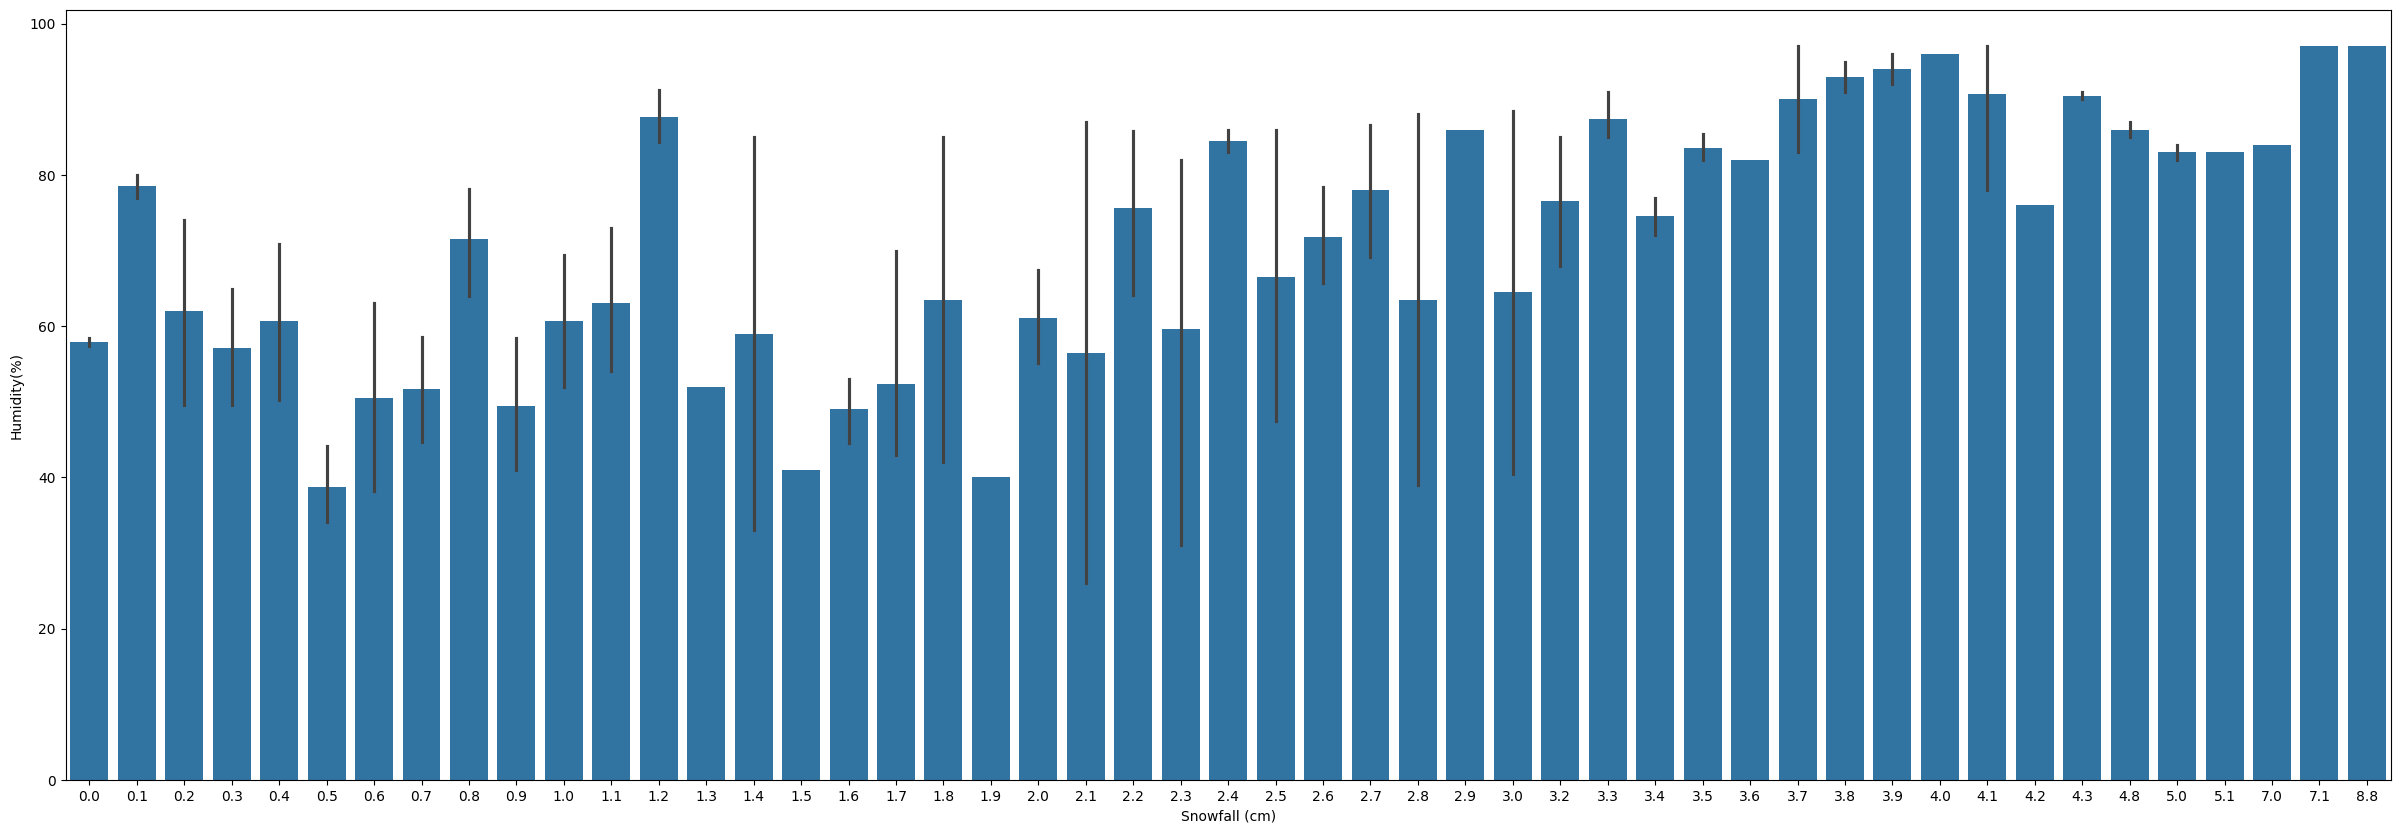

In [261]:
plt.figure(figsize=(30,10))
sns.barplot(x='Snowfall (cm)',y='Humidity(%)', data=bike)

In [286]:
snow_0 = bike[bike['Snowfall (cm)']==0.0]
snow = bike[bike['Snowfall (cm)']>0.0]
snow_0_humidity = snow_0['Humidity(%)'].mean()
snow_humidity = snow['Humidity(%)'].mean()
print('적설량 0일 때의 습도 :', round(snow_0_humidity,2))
print('적설량 0이상일 때의 습도 :', round(snow_humidity,2))

적설량 0일 때의 습도 : 57.95
적설량 0이상일 때의 습도 : 61.72


적설량에서는 약간의 습도차이가 있지만, 적설량이 0이상이더라도 습도가 낮은 경우도 있기 떄문에 관계를 확인하기 어렵다.

In [283]:
snow_0_rent = snow_0['Rented Bike Count'].mean()
snow_rent = snow['Rented Bike Count'].mean()
print('적설량 0일 때의 대여 건수 :', round(snow_0_rent,2))
print('적설량 0이상일 때의 대여 건수 :', round(snow_rent,2))

적설량 0일 때의 대여 건수 : 736.4
적설량 0이상일 때의 대여 건수 : 189.03


눈이 올 때도 대여 건수가 훨씬 적은 것을 알 수 있다. 하지만, 비가 올 때보다 눈이 올 때의 대여 건수가 더 많다.

### 4-11 Humidity(%)

- 습도를 의미하는 변수

<Axes: xlabel='Humidity(%)', ylabel='Solar Radiation (MJ/m2)'>

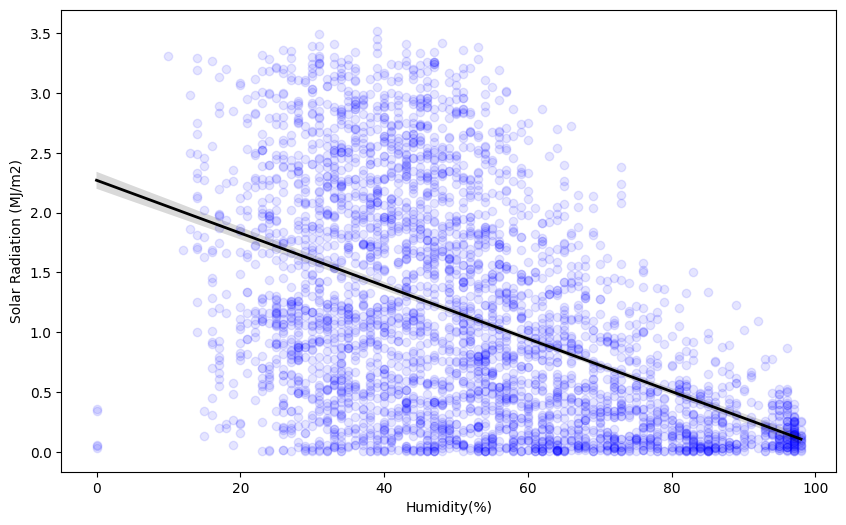

In [285]:
plt.figure(figsize=(10,6))
sns.regplot(x='Humidity(%)', y='Solar Radiation (MJ/m2)', data=bike_sr0,
            scatter_kws={'alpha':0.1}, color='blue', line_kws={'color': 'black', 'linewidth': 2})
# 일사량이 0.0인 데이터는 제외하고 그래프를 그린다.

습도와 일사량은 반비례인 것을 알 수 있다.

### 4-12 Dew point temperature(°C)

- 이슬점 온도를 의미하는 변수
- 이슬점 온도는 온도, 습도, 바람에 의해 변화함

<Axes: xlabel='Temperature(°C)', ylabel='Dew point temperature(°C)'>

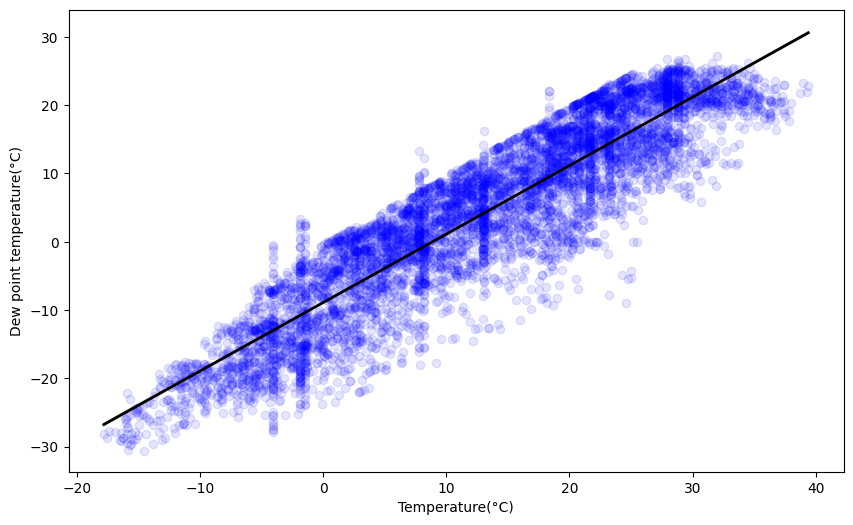

In [292]:
plt.figure(figsize=(10,6))
sns.regplot(x='Temperature(°C)', y='Dew point temperature(°C)', data=bike,
            scatter_kws={'alpha':0.1}, color='blue', line_kws={'color': 'black', 'linewidth': 2})

온도가 변화함에 따라 이슬점 온도도 같이 변화하는 것을 알 수 있다.

<Axes: xlabel='Humidity(%)', ylabel='Dew point temperature(°C)'>

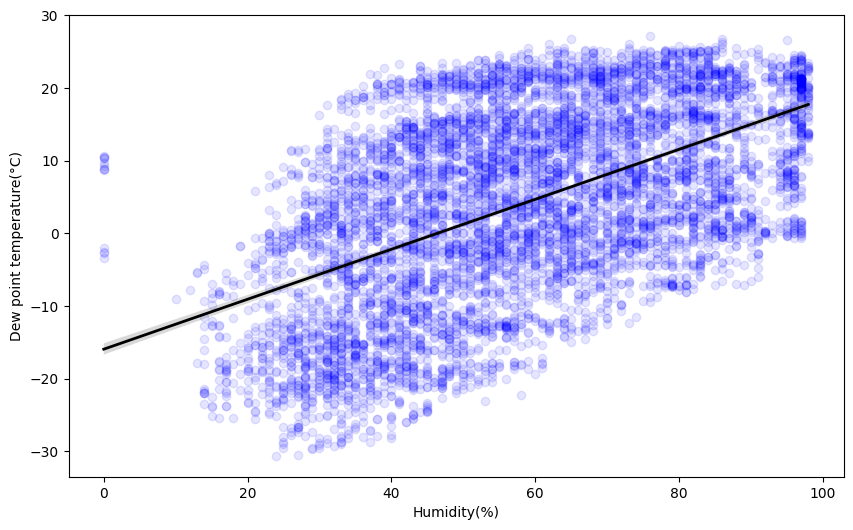

In [298]:
plt.figure(figsize=(10,6))
sns.regplot(x='Humidity(%)', y='Dew point temperature(°C)', data=bike,
            scatter_kws={'alpha':0.1}, color='blue', line_kws={'color': 'black', 'linewidth': 2})

습도가 높아질수록 이슬점 온도도 증가하는 것을 알 수 있다. 계절마다 온도 변화는 다를 수 있지만, 모든 계절에서 증가하는 것을 보여준다.

<Axes: xlabel='Wind speed (m/s)', ylabel='Dew point temperature(°C)'>

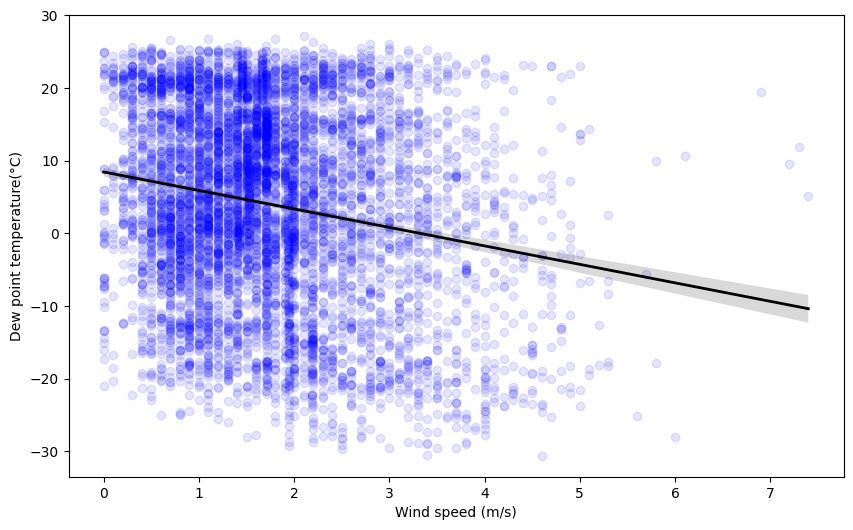

In [299]:
plt.figure(figsize=(10,6))
sns.regplot(x='Wind speed (m/s)', y='Dew point temperature(°C)', data=bike,
            scatter_kws={'alpha':0.1}, color='blue', line_kws={'color': 'black', 'linewidth': 2})

풍속이 강할수록 이슬점 온도가 하락하는 것을 볼 수 있다. \
하지만 자료의 분포가 고르게 되어있기 때문에 풍속에 의한 것인지 단정지을 수 없다.